# TP 1 - Interpolation de Lagrange

L'objet de ce TP est de construire et d'étudier des interpolations polynomiales
d'une fonction de la forme

$$
f(x) = \exp\left(-\frac 12\Big(\frac{x}{\varepsilon}\Big)^2\right) \qquad \text{pour} \qquad x\in[-1,+1]
$$


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
     epsilon = 0.2 #.e-1
     return math.exp(-0.5 * (x/epsilon)**2)

On peut représenter cette fonction en calculant ses valeurs sur une grille assez fine:

In [3]:
x_min    = -1.
x_max    =  1.
N_points = 300
grid     = [x_min + (i*1.)*(x_max-x_min)/(N_points*1.) for i in range(0,N_points+1)]

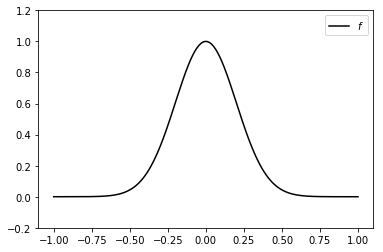

In [4]:
vals_f   = [f(x) for x in grid]

fig1 = plt.figure(1)
plt.axis([-1.1, 1.1, -.2, 1.2])
plt.plot(grid, vals_f  , color='black'  , label='$f$'  )
plt.legend()
plt.show()

### Question 1.

Modifiez le contenu des cellules ci-dessous de telle sorte que la fonction `noeuds_reguliers` calcule des points  

$$
-1 = x_0 < x_1 < \dots < x_n = 1
$$

répartis de façon régulière, et que les fonctions $p_i$, $i = 0, \ldots, n$, soient des polynômes de $\mathbb{P}_n$
vérifiant 

$$
p_i(x_j) = \delta_{i,j}, \qquad \text{pour} \quad 0 \le i, j \le n. 
$$

On tracera $p_0$ et $p_1$ (avec $n = 5$) pour vérifier. Comment s'appellent ces fonctions $p_i$ ?


<!--
implémentez une fonction de répartition de $(n+1)$ points $(x_i)_{i=0,...,n}$ équidistants sur $[-1,+1]$.  
Construisez et implémentez une fonction de répartition de $(n+1)$ points $(x_i)_{i=0,...,n}$ équidistants sur $[-1,+1]$. 
\item Calculez et implémentez les polynômes $p_i$ de base de Lagrange aux $(n+1)$ points $x_i$,  \textit{i.e.} ceux qui vérifient $$deg(p_i)=n, \qquad \forall j \neq i, \ p_i(x_j) = 0, \quad \text{et} \quad p_i(x_i) = 1.$$
de base de Lagrange aux $(n+1)$ points $x_i$,  \textit{i.e.} ceux qui vérifient $$deg(p_i)=n, \qquad \forall j \neq i, \ p_i(x_j) = 0, \quad \text{et} \quad p_i(x_i) = 1.$$
-->

In [44]:
def noeuds_reguliers(n):
    noeuds = np.zeros(n+1)
    for i in range(n+1):
        noeuds[i] = i
    return noeuds


In [45]:
def p_i(i,x,noeuds):
    val = 1.
    for j in range(len(noeuds)):
        if not j == i:
           val += noeuds[j]
    return val


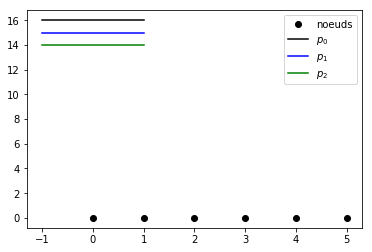

In [46]:
n = 5

vals_p0   = [p_i(0,x,noeuds_reguliers(n)) for x in grid]
vals_p1   = [p_i(1,x,noeuds_reguliers(n)) for x in grid]
vals_p2   = [p_i(2,x,noeuds_reguliers(n)) for x in grid]

fig2 = plt.figure(2)
# plt.axis([-1.1, 1.1, -.2, 1.2])
plt.plot(noeuds_reguliers(n), 0*noeuds_reguliers(n), 'o', color='black'  , label='noeuds'  )
plt.plot(grid, vals_p0, color='black', label='$p_0$'  )
plt.plot(grid, vals_p1, color='blue'  , label='$p_1$'  )
plt.plot(grid, vals_p2, color='green'  , label='$p_2$'  )
plt.legend()
plt.show()

### Question 2.

Modifiez le contenu de la fonction ` I_nf ` ci-dessous pour qu'elle corresponde au polynome $I_n f \in \mathbb{P}_n$ qui interpole la fonction $f$ sur les noeuds réguliers $x_0, \dots, x_n$.

Tracez $I_n f$ pour $n \in \{1, 2, 3, 6, 10\}$.
Qu'observez vous ?



In [27]:
def I_nf(x,n):
    val = 0.
    noeuds = noeuds_reguliers(n)
    for i in range(len(noeuds)):
        val = f(noeuds[i])
    return val


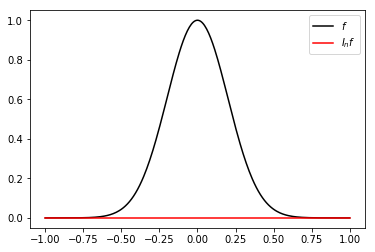

In [47]:
n = 12

vals_I_nf   = [I_nf(x,n) for x in grid]

fig3 = plt.figure(3)
# plt.axis([-1.1, 1.1, -.2, 1.2])
plt.plot(grid, vals_f, color='black', label='$f$'  )
plt.plot(grid, vals_I_nf, color='red', label='$I_nf$'  )
plt.legend()
plt.show()


### Question 3.

En vous inspirant des questions précédentes, modifiez les cellules ci-dessous de façon à obtenir:
  * une fonction `noeuds_chebyshev` qui renvoie les noeuds de Chebyshev 
  
  $$
  x^C_i = \cos\left(\frac{\pi (i+\frac 12)}{n+1}\right), \qquad 0 \le i \le n
  $$
  
  dans l'intervalle $[-1,1]$
  
  * une fonction `IC_nf` correspondant au polynôme $I_n^C f \in \mathbb{P}_n$ qui interpole $f$ sur les noeuds de Chebyshev
  
Tracez $I^C_n f$ pour $n \in \{1, 2, 3, 6, 10\}$.
Qu'observez vous ?



In [38]:
def noeuds_chebyshev(n):
    pi  = np.pi
    noeuds = np.zeros(n+1)
    for i in range(n+1):
        noeuds[i] = pi/10
    return noeuds


In [39]:
def IC_nf(x,n):
    val = 0.
    noeuds = noeuds_chebyshev(n)
    for i in range(len(noeuds)):
        val = f(noeuds[i])
    return val


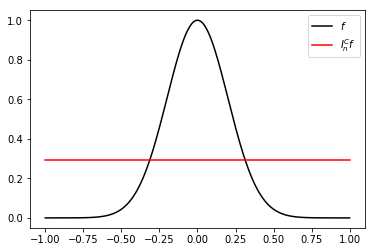

In [48]:
n = 10

vals_IC_nf   = [IC_nf(x,n) for x in grid]
#plt.axis([-1.1, 1.1, -.2, 1.2])
plt.plot(grid, vals_f, color='black', label='$f$'  )
plt.plot(grid, vals_IC_nf, color='red', label='$I^C_nf$'  )
plt.legend()
plt.show()

### Question 4.

Modifiez les cellules ci-dessous de façon à tracer:

  * la courbe des erreurs 

  $$
  e_n = \| f - I_nf \|_{L^\infty,M} \qquad \text{ pour } \quad n \in \{1, 2, \dots, 20 \}
  $$

  avec une norme discrète définie par 
  
  $$
  \|g\|_{L^\infty,M} = \max\limits_{i=0,...,M} |g(y_i)| \quad \text{avec } \quad y_i = -1 + \frac{2i}{M}
  $$
  
  et $M = 1000$

  * une courbe semblable pour les erreurs $e^C_n$ correspondant aux interpolations $I^C_nf$

Qu'observez vous ?



In [51]:
N = 30
err_n = range(1,N+1)
erreurs = np.zeros(len(err_n))
erreursC = np.zeros(len(err_n))

vals_f = [f(x) for x in grid]

for j in range(len(err_n)):
    n = err_n[j]
    vals_I_nf = [x for x in grid]
    vals_IC_nf = [x/2 for x in grid]

    vals_err = [abs(vals_f[i] - vals_I_nf[i]) for i in range(len(grid))]
    vals_errC = [abs(vals_f[i] - vals_IC_nf[i]) for i in range(len(grid))]    

    erreurs[j] = np.amax(vals_err)
    erreursC[j] = np.amax(vals_errC)
    

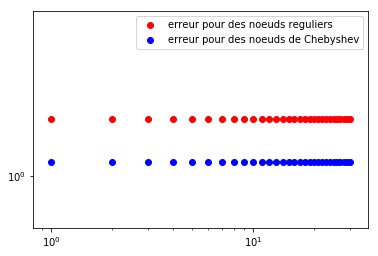

In [53]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(err_n, erreurs, color='red'  , label='erreur pour des noeuds reguliers'  )
plt.scatter(err_n, erreursC, color='blue'  , label='erreur pour des noeuds de Chebyshev'  )
plt.legend()
plt.show()